In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support, roc_auc_score, average_precision_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def EDA(data):
    # Statistics description like (mean, mode, median)
    print("Descriptive Statistics:")
    print(data.describe())

    # Histograms for numeric data
    print("\nHistograms:")
    for column in data.select_dtypes(include='number'):
        plt.figure(figsize=(6, 4))
        sns.histplot(data[column], bins=20, kde=True)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

    # Bar charts for categorical data and object type data
    print("\nBar Charts:")
    for column in data.columns:
        if isinstance(data[column].dtype, pd.CategoricalDtype):  # if categorical
            plt.figure(figsize=(6, 4))
            sns.countplot(data[column])
            plt.title(f'Bar Chart of {column}')
            plt.xlabel(column)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.show()
        elif data[column].dtype == 'object':  # object dtype for categorical variables
            plt.figure(figsize=(6, 4))
            sns.countplot(data[column])
            plt.title(f'Bar Chart of {column}')
            plt.xlabel(column)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.show()

Missing values before handling:
LoyaltyID            0
Customer ID          0
Senior Citizen       0
Partner              0
Dependents           0
Tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        1
 Churn               0
dtype: int64
Descriptive Statistics:
            Tenure  Monthly Charges  Total Charges
count  7043.000000      7043.000000    7043.000000
mean     32.371149        64.761692    2283.300441
std      24.559481        30.090047    2265.000258
min       0.000000        18.250000      18.800000
25%       9.000000        35.500000     402.225000
50%      29.000000        70.350000    1400.550000
75%      55.000000        89.850000    3786.600000
max      72.000000       118.750000    8

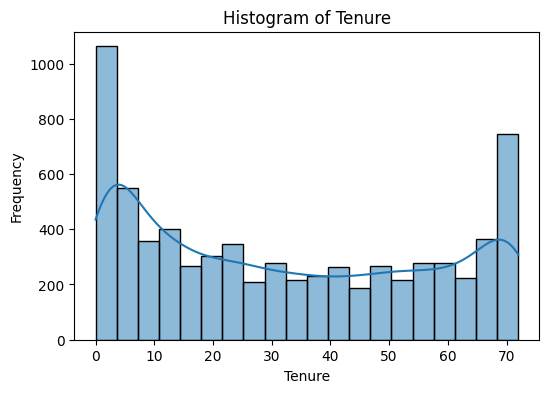

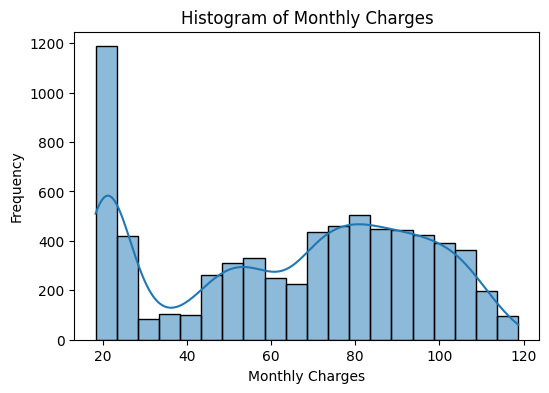

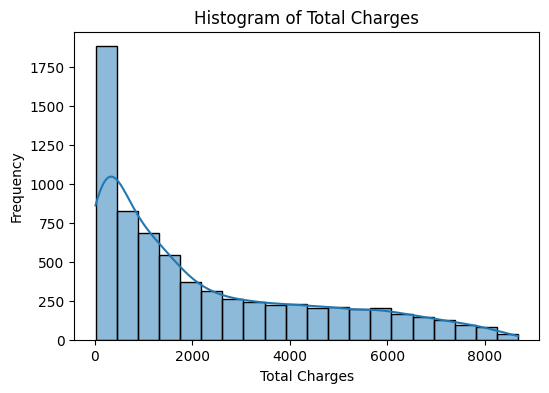


Bar Charts:


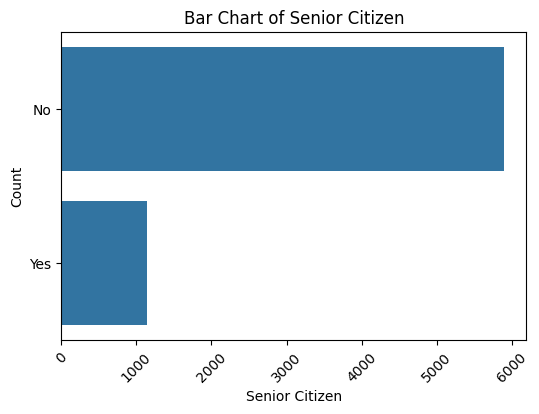

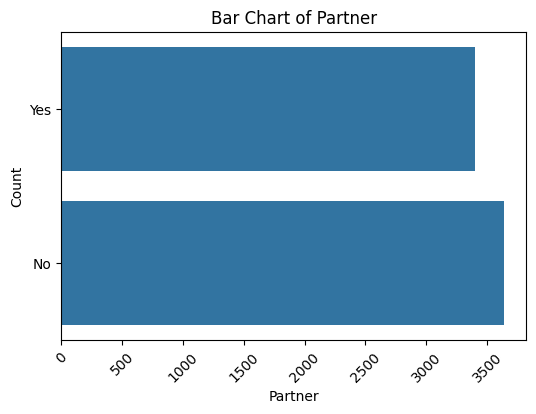

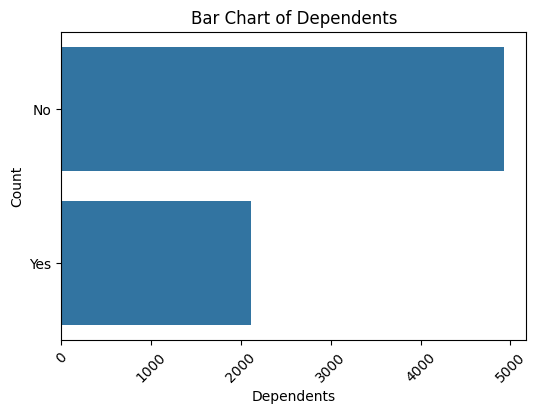

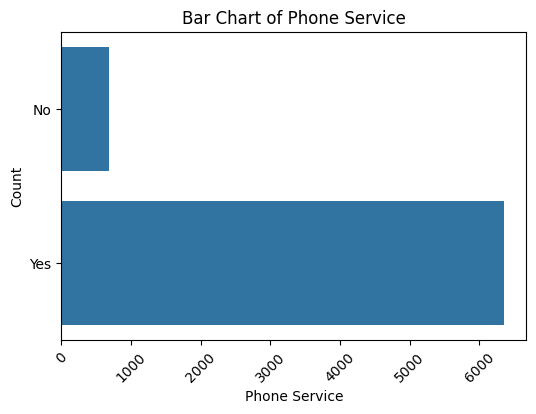

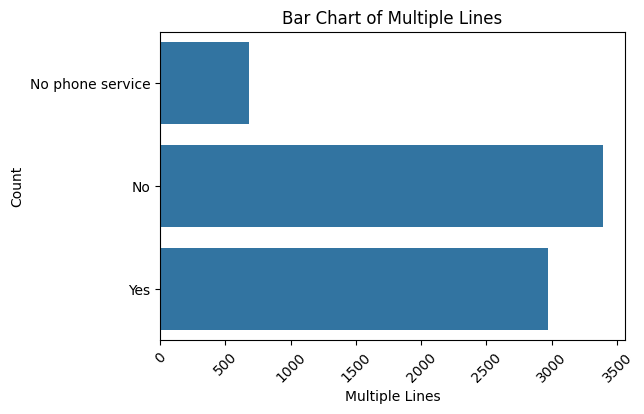

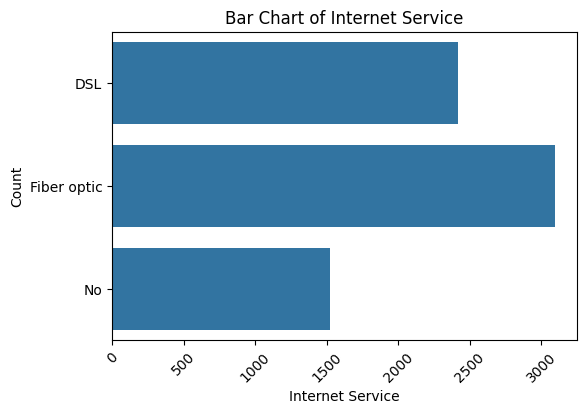

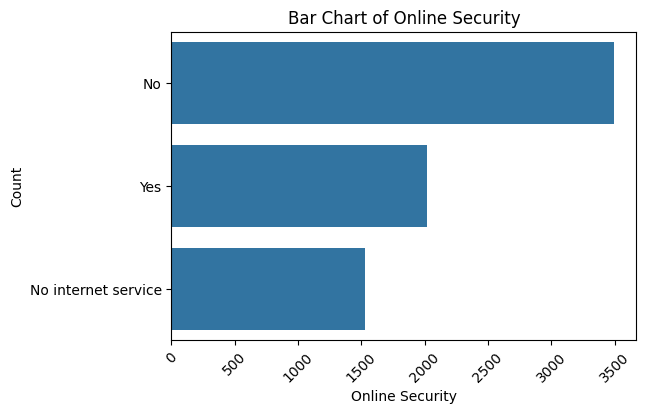

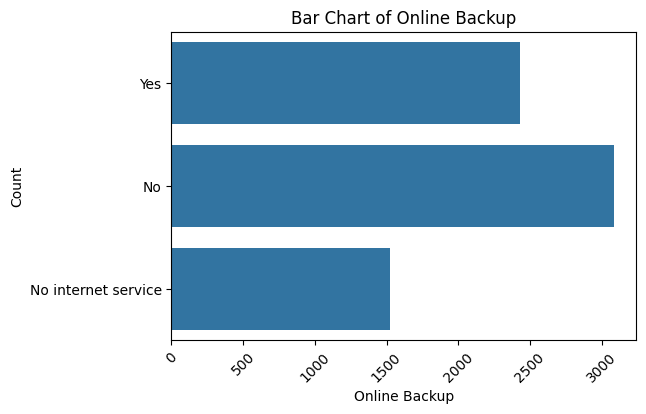

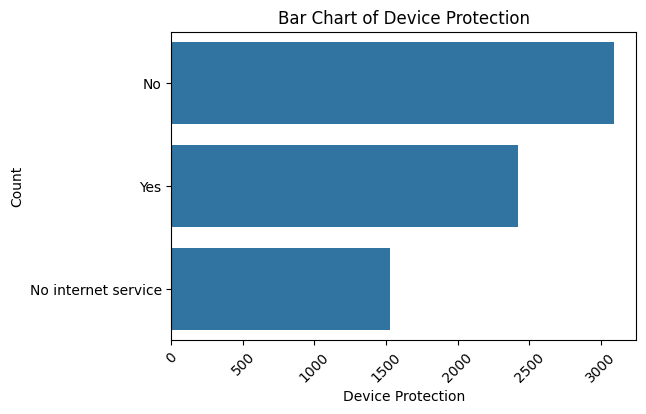

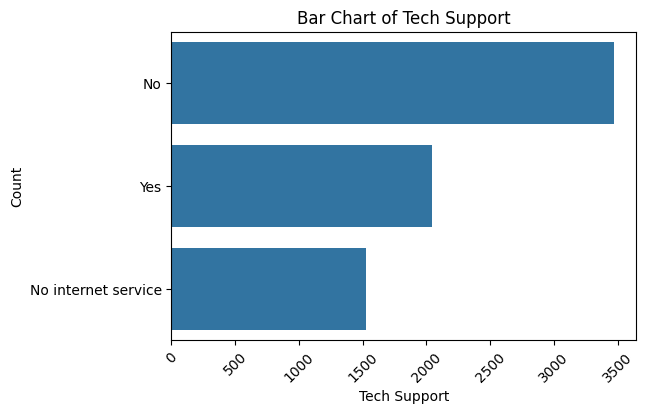

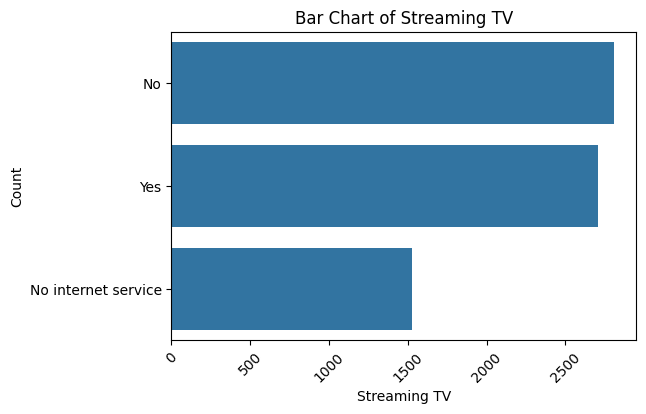

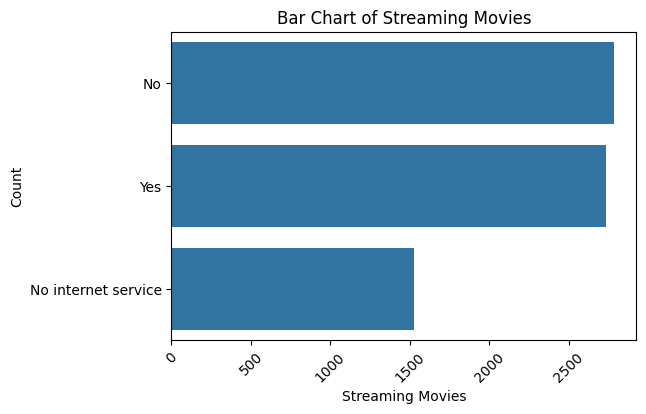

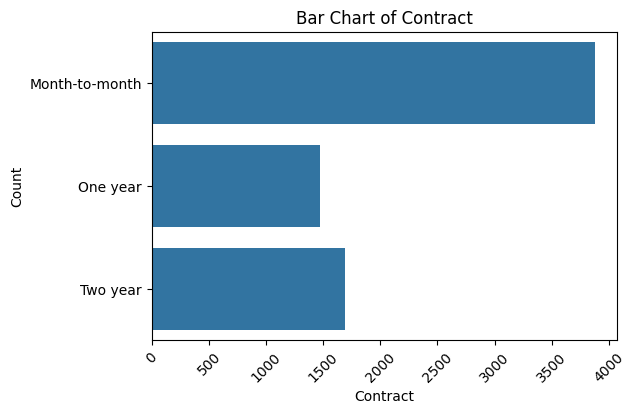

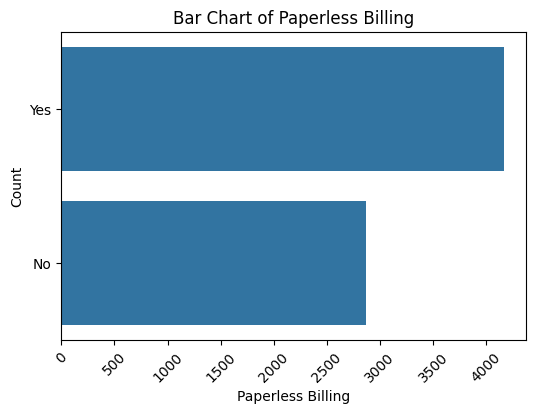

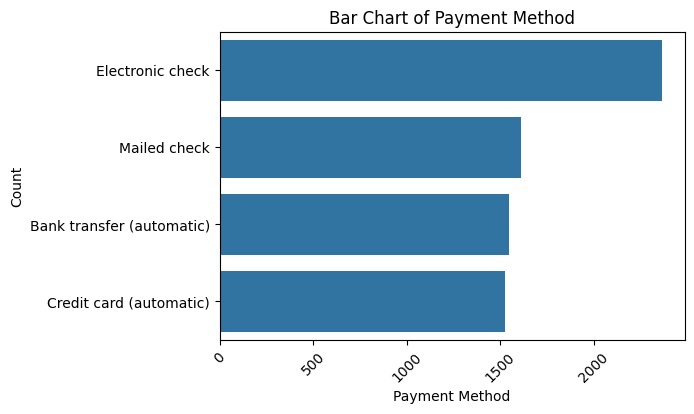

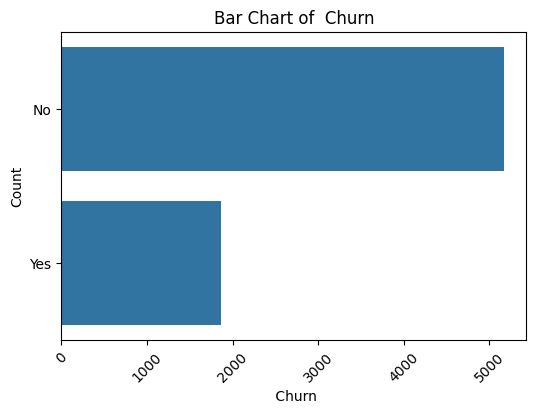

Class Distribution Before Algorithmic Methods:
 Churn
0    5174
1    1869
Name: count, dtype: int64


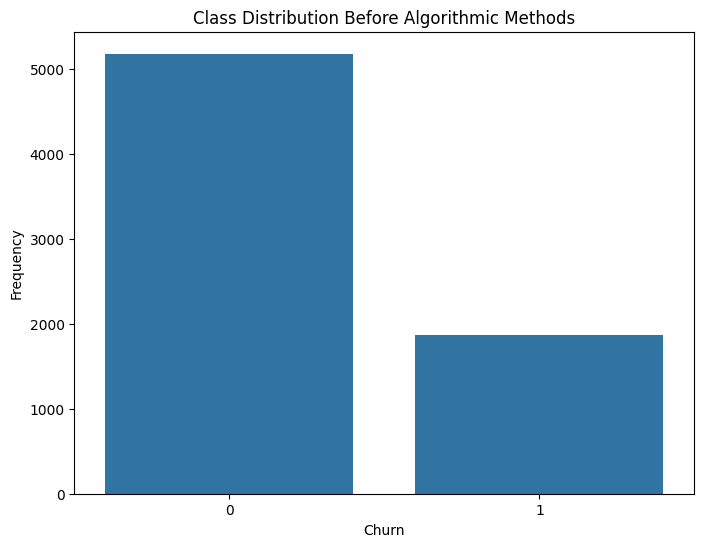

Logistic Regression:
Accuracy: 0.7984386089425124
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409

Decision Tree Classifier:
Accuracy: 0.7281760113555713
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1035
           1       0.49      0.51      0.50       374

    accuracy                           0.73      1409
   macro avg       0.65      0.66      0.66      1409
weighted avg       0.73      0.73      0.73      1409

Linear Discriminant Analysis (LDA):
Accuracy: 0.78708303761533
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1035
           1       0.61      0.53      0.57       374

    accuracy  

In [6]:
##second dataset on Customer Churn

file_path = '/content/drive/My Drive/CustomerChurn.csv'
data2 = pd.read_csv(file_path)

# Data Cleaning
data2 = data2.drop_duplicates()
print("Missing values before handling:")
print(data2.isnull().sum())

# Drop 'LoyaltyID' and 'Customer ID' columns
columns_to_remove = ['LoyaltyID', 'Customer ID']
data2 = data2.drop(columns=columns_to_remove, errors='ignore')

# Convert 'Total Charges' to numeric, forcing errors to NaN
data2['Total Charges'] = pd.to_numeric(data2['Total Charges'], errors='coerce')

# Calculate the mean value for 'Total Charges'
mean_value = data2['Total Charges'].mean()

# Fill missing values with the mean
data2['Total Charges'].fillna(mean_value, inplace=True)
EDA(data2)

# Encode categorical variables
categorical_features = ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines',
                        'Internet Service', 'Online Security', 'Online Backup', 'Device Protection',
                        'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract',
                        'Paperless Billing', 'Payment Method']

# Add 'Churn' to the list of categorical features for encoding
categorical_features.append(' Churn')

label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    data2[col] = le.fit_transform(data2[col].astype(str))  # Ensure all values are treated as strings
    label_encoders[col] = le

# Reprepare data after encoding
X = data2.drop(' Churn', axis=1)
y = data2[' Churn']

# Check class distribution before applying algorithmic methods
class_distribution_before = data2[' Churn'].value_counts()
print("Class Distribution Before Algorithmic Methods:")
print(class_distribution_before)

# Plot class distribution before applying algorithmic methods
plt.figure(figsize=(8, 6))
sns.countplot(x=' Churn', data=data2)
plt.title('Class Distribution Before Algorithmic Methods')
plt.xlabel('Churn')
plt.ylabel('Frequency')
plt.show()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and fit models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Linear Discriminant Analysis (LDA)": LinearDiscriminantAnalysis(),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))


Selected Features with Logistic Regression: Index(['Tenure', 'Phone Service', 'Internet Service', 'Online Security',
       'Online Backup', 'Tech Support', 'Contract', 'Paperless Billing',
       'Monthly Charges', 'Total Charges'],
      dtype='object')

Baseline Performance on Imbalanced Data with Algorithmic Methods:
Logistic Regression - Mean Accuracy: 0.7443978235564821 ± 0.006956852424504566
Decision Tree - Mean Accuracy: 0.7361898949430418 ± 0.005503078343578793
K-Nearest Neighbors - Mean Accuracy: 0.7756838299893442 ± 0.011245082552455566
Linear Discriminant Analysis - Mean Accuracy: 0.7918801725601757 ± 0.013511037318732391
Naive Bayes - Mean Accuracy: 0.7568235343336179 ± 0.013356500891490286

Logistic Regression

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1035
           1       0.49      0.78      0.61       374

    accuracy                           0.73      1409
   m

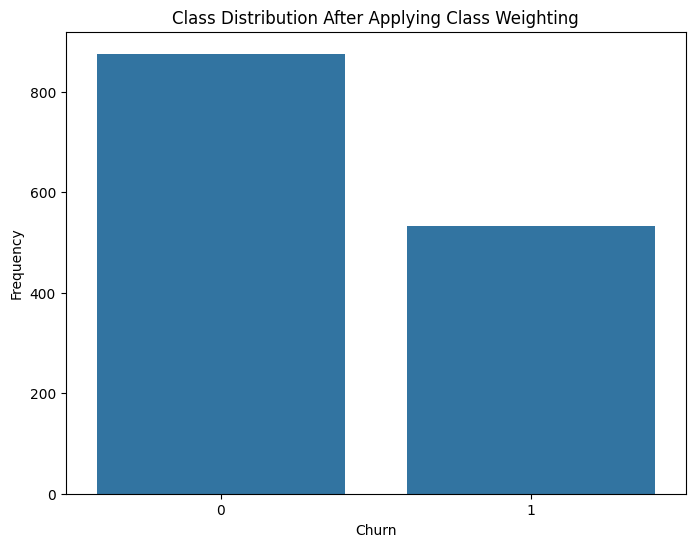

In [ ]:

# Prepare data
X = data2.drop(' Churn', axis=1)
y = data2[' Churn']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Further split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Feature Selection using RFE with Logistic Regression
model = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X_train, y_train)
selected_features = X.columns[rfe.support_]
print("Selected Features with Logistic Regression:", selected_features)

# Prepare the dataset with selected features
X_train_selected = X_train[:, rfe.support_]
X_test_selected = X_test[:, rfe.support_]

# Define the classifiers with class_weight parameter
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "K-Nearest Neighbors": KNeighborsClassifier(),  # KNN doesn't directly support class weights, but other techniques can be applied.
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Naive Bayes": GaussianNB()
}

# Perform cross-validation and record metrics
print("\nBaseline Performance on Imbalanced Data with Algorithmic Methods:")
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train_selected, y_train, cv=5, scoring='accuracy')
    print(f"{name} - Mean Accuracy: {scores.mean()} ± {scores.std()}")

# Train and evaluate models
for name, clf in classifiers.items():
    print(f"\n{name}")

    clf.fit(X_train_selected, y_train)
    y_pred = clf.predict(X_test_selected)
    y_pred_proba = clf.predict_proba(X_test_selected)[:, 1]  # Probabilities for the positive class

    # Print classification report
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Compute and print ROC-AUC
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC-AUC: {roc_auc:.4f}")

    # Compute and print PR-AUC
    pr_auc = average_precision_score(y_test, y_pred_proba)
    print(f"PR-AUC: {pr_auc:.4f}")


 # Print the exact count of each class
print(f"Class Distribution for {name}:")
print(pd.Series(y_pred).value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(x=y_pred)
plt.title('Class Distribution After Applying Class Weighting')
plt.xlabel('Churn')
plt.ylabel('Frequency')
plt.show()